In [10]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_predict, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
import numpy as np

df = pd.read_csv("hasil_discretize.csv")

In [11]:
# 1. Pisahkan fitur dan label
X = df.drop("DIAGNOSIS AWAL", axis=1)
y = df["DIAGNOSIS AWAL"]

# 2. Label encode target jika masih teks
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

# 3. One-hot encode fitur kategorikal
X = pd.get_dummies(X)

# 4. Definisikan parameter grid
param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, 10]
}

# 5. Inisialisasi model
gb = GradientBoostingClassifier(random_state=42)
cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# 6. Hyperparameter tuning dengan GridSearchCV
grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    cv=cv_strategy,
    n_jobs= -1,
    verbose=1,
    scoring='roc_auc'
)

# 7. Fit ke seluruh data
grid_search.fit(X, y)
print("Best Parameters:\n", grid_search.best_params_)

# 8. Model terbaik
best_model = grid_search.best_estimator_

# 9. Evaluasi model terbaik pada semua data dengan cross_val_predict
y_pred = cross_val_predict(best_model, X, y, cv=cv_strategy)
y_prob = cross_val_predict(best_model, X, y, cv=cv_strategy, method="predict_proba")[:, 1]

# 10. Hitung metrik evaluasi
cm = confusion_matrix(y, y_pred)
tn, fp, fn, tp = cm.ravel()
accuracy = accuracy_score(y, y_pred)
auc = roc_auc_score(y, y_prob)
sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0.0
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0.0

# 11. Tampilkan hasil evaluasi
print("\n=== Hasil Evaluasi 10-Fold Cross Validation ===")
print(f"Akurasi     : {accuracy:.4f}")
print(f"AUC         : {auc:.4f}")
print(f"Sensitivity : {sensitivity:.4f}")
print(f"Specificity : {specificity:.4f}")
print("\nClassification Report:\n", classification_report(y, y_pred))

# 12. Skor akurasi per fold
cv_scores = cross_val_score(best_model, X, y, cv=cv_strategy, scoring='accuracy')
print("\nAkurasi Tiap Fold:")
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score:.4f}")
print(f"Rata-rata Akurasi: {np.mean(cv_scores):.4f}")

# 13. (Opsional) Simpan hasil prediksi ke CSV
output_df = df.copy()
output_df["Prediksi"] = y_pred
output_df["Probabilitas_Positive"] = y_prob
output_df.to_csv("hasil_prediksi_gradient_boosting.csv", index=False)
print("\n Hasil prediksi disimpan ke 'hasil_prediksi_gradient_boosting.csv'")

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Best Parameters:
 {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 150, 'subsample': 1.0}

=== Hasil Evaluasi 10-Fold Cross Validation ===
Akurasi     : 0.6952
AUC         : 0.7614
Sensitivity : 0.6879
Specificity : 0.7019

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.70      0.71       587
           1       0.68      0.69      0.68       535

    accuracy                           0.70      1122
   macro avg       0.69      0.69      0.69      1122
weighted avg       0.70      0.70      0.70      1122


Akurasi Tiap Fold:
Fold 1: 0.6549
Fold 2: 0.7080
Fold 3: 0.6429
Fold 4: 0.6964
Fold 5: 0.7232
Fold 6: 0.6518
Fold 7: 0.7500
Fold 8: 0.7411
Fold 9: 0.7054
Fold 10: 0.6786
Rata-rata Akurasi: 0.6952

 Hasil prediksi disimpan ke 'hasil_prediksi_gradient_boosting.csv'


In [21]:
# 1. Pisahkan fitur dan label
X = df.drop("DIAGNOSIS AWAL", axis=1)
y = df["DIAGNOSIS AWAL"]

# 2. Label encode target jika masih teks
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

# 3. One-hot encode fitur kategorikal
X = pd.get_dummies(X)

# 4. Definisikan parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, 10]
}

# 5. Inisialisasi model
gb = GradientBoostingClassifier(random_state=42)
cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# 6. Hyperparameter tuning dengan GridSearchCV
grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    cv=cv_strategy,
    n_jobs= -1,
    verbose=1,
    scoring='roc_auc'
)

# 7. Fit ke seluruh data
grid_search.fit(X, y)
print("Best Parameters:\n", grid_search.best_params_)

# 8. Model terbaik
best_model = grid_search.best_estimator_

# 9. Evaluasi model terbaik pada semua data dengan cross_val_predict
y_pred = cross_val_predict(best_model, X, y, cv=cv_strategy)
y_prob = cross_val_predict(best_model, X, y, cv=cv_strategy, method="predict_proba")[:, 1]

# 10. Hitung metrik evaluasi
cm = confusion_matrix(y, y_pred)
tn, fp, fn, tp = cm.ravel()
accuracy = accuracy_score(y, y_pred)
auc = roc_auc_score(y, y_prob)
sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0.0
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0.0

# 11. Tampilkan hasil evaluasi
print("\n=== Hasil Evaluasi 10-Fold Cross Validation ===")
print(f"Akurasi     : {accuracy:.4f}")
print(f"AUC         : {auc:.4f}")
print(f"Sensitivity : {sensitivity:.4f}")
print(f"Specificity : {specificity:.4f}")
print("\nClassification Report:\n", classification_report(y, y_pred))

# 12. Skor akurasi per fold
cv_scores = cross_val_score(best_model, X, y, cv=cv_strategy, scoring='accuracy')
print("\nAkurasi Tiap Fold:")
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score:.4f}")
print(f"Rata-rata Akurasi: {np.mean(cv_scores):.4f}")

# 13. (Opsional) Simpan hasil prediksi ke CSV
output_df = df.copy()
output_df["Prediksi"] = y_pred
output_df["Probabilitas_Positive"] = y_prob
output_df.to_csv("hasil_prediksi_gradient_boosting.csv", index=False)
print("\n Hasil prediksi disimpan ke 'hasil_prediksi_gradient_boosting.csv'")

Fitting 10 folds for each of 72 candidates, totalling 720 fits
Best Parameters:
 {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 150, 'subsample': 1.0}

=== Hasil Evaluasi 10-Fold Cross Validation ===
Akurasi     : 0.6952
AUC         : 0.7614
Sensitivity : 0.6879
Specificity : 0.7019

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.70      0.71       587
           1       0.68      0.69      0.68       535

    accuracy                           0.70      1122
   macro avg       0.69      0.69      0.69      1122
weighted avg       0.70      0.70      0.70      1122


Akurasi Tiap Fold:
Fold 1: 0.6549
Fold 2: 0.7080
Fold 3: 0.6429
Fold 4: 0.6964
Fold 5: 0.7232
Fold 6: 0.6518
Fold 7: 0.7500
Fold 8: 0.7411
Fold 9: 0.7054
Fold 10: 0.6786
Rata-rata Akurasi: 0.6952

 Hasil prediksi disimpan ke 'hasil_prediksi_gradient_boosting.csv'


In [20]:
# 1. Pisahkan fitur dan label
X = df.drop("DIAGNOSIS AWAL", axis=1)
y = df["DIAGNOSIS AWAL"]

# 2. Label encode target jika masih teks
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

# 3. One-hot encode fitur kategorikal
X = pd.get_dummies(X)

# 4. Definisikan parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5]
}

# 5. Inisialisasi model
gb = GradientBoostingClassifier(random_state=42)
cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# 6. Hyperparameter tuning dengan GridSearchCV
grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    cv=cv_strategy,
    n_jobs= -1,
    verbose=1,
    scoring='roc_auc'
)

# 7. Fit ke seluruh data
grid_search.fit(X, y)
print("Best Parameters:\n", grid_search.best_params_)

# 8. Model terbaik
best_model = grid_search.best_estimator_

# 9. Evaluasi model terbaik pada semua data dengan cross_val_predict
y_pred = cross_val_predict(best_model, X, y, cv=cv_strategy)
y_prob = cross_val_predict(best_model, X, y, cv=cv_strategy, method="predict_proba")[:, 1]

# 10. Hitung metrik evaluasi
cm = confusion_matrix(y, y_pred)
tn, fp, fn, tp = cm.ravel()
accuracy = accuracy_score(y, y_pred)
auc = roc_auc_score(y, y_prob)
sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0.0
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0.0

# 11. Tampilkan hasil evaluasi
print("\n=== Hasil Evaluasi 10-Fold Cross Validation ===")
print(f"Akurasi     : {accuracy:.4f}")
print(f"AUC         : {auc:.4f}")
print(f"Sensitivity : {sensitivity:.4f}")
print(f"Specificity : {specificity:.4f}")
print("\nClassification Report:\n", classification_report(y, y_pred))

# 12. Skor akurasi per fold
cv_scores = cross_val_score(best_model, X, y, cv=cv_strategy, scoring='accuracy')
print("\nAkurasi Tiap Fold:")
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score:.4f}")
print(f"Rata-rata Akurasi: {np.mean(cv_scores):.4f}")

# 13. (Opsional) Simpan hasil prediksi ke CSV
output_df = df.copy()
output_df["Prediksi"] = y_pred
output_df["Probabilitas_Positive"] = y_prob
output_df.to_csv("hasil_prediksi_gradient_boosting.csv", index=False)
print("\n Hasil prediksi disimpan ke 'hasil_prediksi_gradient_boosting.csv'")

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Best Parameters:
 {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 150, 'subsample': 0.8}

=== Hasil Evaluasi 10-Fold Cross Validation ===
Akurasi     : 0.6881
AUC         : 0.7626
Sensitivity : 0.6710
Specificity : 0.7036

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.70      0.70       587
           1       0.67      0.67      0.67       535

    accuracy                           0.69      1122
   macro avg       0.69      0.69      0.69      1122
weighted avg       0.69      0.69      0.69      1122


Akurasi Tiap Fold:
Fold 1: 0.6814
Fold 2: 0.6903
Fold 3: 0.6429
Fold 4: 0.6964
Fold 5: 0.7143
Fold 6: 0.6250
Fold 7: 0.7232
Fold 8: 0.7321
Fold 9: 0.6964
Fold 10: 0.6786
Rata-rata Akurasi: 0.6881

 Hasil prediksi disimpan ke 'hasil_prediksi_gradient_boosting.csv'


In [7]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_predict, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
import numpy as np

df = pd.read_csv("hasil_discretize.csv")
# 1. Pisahkan fitur dan label
X = df.drop("DIAGNOSIS AWAL", axis=1)
y = df["DIAGNOSIS AWAL"]

# 2. Label encode target jika masih teks
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

# 3. One-hot encode fitur kategorikal
X = pd.get_dummies(X)

# 4. Definisikan parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, 10]
}

# 5. Inisialisasi model
gb = GradientBoostingClassifier(random_state=42)
cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# 6. Hyperparameter tuning dengan GridSearchCV
grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    cv=cv_strategy,
    n_jobs= -1,
    verbose=1,
    scoring='roc_auc'
)

# 7. Fit ke seluruh data
grid_search.fit(X, y)
print("Best Parameters:\n", grid_search.best_params_)

# 8. Model terbaik
best_model = grid_search.best_estimator_

# 9. Evaluasi model terbaik pada semua data dengan cross_val_predict
y_pred = cross_val_predict(best_model, X, y, cv=cv_strategy)
y_prob = cross_val_predict(best_model, X, y, cv=cv_strategy, method="predict_proba")[:, 1]

# 10. Hitung metrik evaluasi
cm = confusion_matrix(y, y_pred)
tn, fp, fn, tp = cm.ravel()
accuracy = accuracy_score(y, y_pred)
auc = roc_auc_score(y, y_prob)
sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0.0
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0.0

# 11. Tampilkan hasil evaluasi
print("\n=== Hasil Evaluasi 10-Fold Cross Validation ===")
print(f"Akurasi     : {accuracy:.4f}")
print(f"AUC         : {auc:.4f}")
print(f"Sensitivity : {sensitivity:.4f}")
print(f"Specificity : {specificity:.4f}")
print("\nClassification Report:\n", classification_report(y, y_pred))

# 12. Skor akurasi per fold
cv_scores = cross_val_score(best_model, X, y, cv=cv_strategy, scoring='accuracy')
print("\nAkurasi Tiap Fold:")
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score:.4f}")
print(f"Rata-rata Akurasi: {np.mean(cv_scores):.4f}")

# 13. (Opsional) Simpan hasil prediksi ke CSV
output_df = df.copy()
output_df["Prediksi"] = y_pred
output_df["Probabilitas_Positive"] = y_prob
output_df.to_csv("hasil_prediksi_gradient_boosting.csv", index=False)
print("\n Hasil prediksi disimpan ke 'hasil_prediksi_gradient_boosting.csv'")

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Best Parameters:
 {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 150, 'subsample': 1.0}

=== Hasil Evaluasi 10-Fold Cross Validation ===
Akurasi     : 0.6952
AUC         : 0.7614
Sensitivity : 0.6879
Specificity : 0.7019

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.70      0.71       587
           1       0.68      0.69      0.68       535

    accuracy                           0.70      1122
   macro avg       0.69      0.69      0.69      1122
weighted avg       0.70      0.70      0.70      1122


Akurasi Tiap Fold:
Fold 1: 0.6549
Fold 2: 0.7080
Fold 3: 0.6429
Fold 4: 0.6964
Fold 5: 0.7232
Fold 6: 0.6518
Fold 7: 0.7500
Fold 8: 0.7411
Fold 9: 0.7054
Fold 10: 0.6786
Rata-rata Akurasi: 0.6952

 Hasil prediksi disimpan ke 'hasil_prediksi_gradient_boosting.csv'


In [12]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_predict, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
import numpy as np

df = pd.read_csv("hasil_discretize.csv")
# 1. Pisahkan fitur dan label
X = df.drop("DIAGNOSIS AWAL", axis=1)
y = df["DIAGNOSIS AWAL"]

# 2. Label encode target jika masih teks
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

# 3. One-hot encode fitur kategorikal
X = pd.get_dummies(X)

# 4. Definisikan parameter grid
param_grid = {
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'max_depth': [2, 3, 4, 5],
    'n_estimators': [100, 150, 200, 250],
    'min_samples_split': [2, 5, 10, 20],
    'subsample': [0.6, 0.8, 1.0]
}

# 5. Inisialisasi model
gb = GradientBoostingClassifier(random_state=42)
cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# 6. Hyperparameter tuning dengan GridSearchCV
grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    cv=cv_strategy,
    n_jobs= -1,
    verbose=1,
    scoring='roc_auc'
)

# 7. Fit ke seluruh data
grid_search.fit(X, y)
print("Best Parameters:\n", grid_search.best_params_)

# 8. Model terbaik
best_model = grid_search.best_estimator_

# 9. Evaluasi model terbaik pada semua data dengan cross_val_predict
y_pred = cross_val_predict(best_model, X, y, cv=cv_strategy)
y_prob = cross_val_predict(best_model, X, y, cv=cv_strategy, method="predict_proba")[:, 1]

# 10. Hitung metrik evaluasi
cm = confusion_matrix(y, y_pred)
tn, fp, fn, tp = cm.ravel()
accuracy = accuracy_score(y, y_pred)
auc = roc_auc_score(y, y_prob)
sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0.0
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0.0

# 11. Tampilkan hasil evaluasi
print("\n=== Hasil Evaluasi 10-Fold Cross Validation ===")
print(f"Akurasi     : {accuracy:.4f}")
print(f"AUC         : {auc:.4f}")
print(f"Sensitivity : {sensitivity:.4f}")
print(f"Specificity : {specificity:.4f}")
print("\nClassification Report:\n", classification_report(y, y_pred))

# 12. Skor akurasi per fold
cv_scores = cross_val_score(best_model, X, y, cv=cv_strategy, scoring='accuracy')
print("\nAkurasi Tiap Fold:")
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score:.4f}")
print(f"Rata-rata Akurasi: {np.mean(cv_scores):.4f}")

# 13. (Opsional) Simpan hasil prediksi ke CSV
output_df = df.copy()
output_df["Prediksi"] = y_pred
output_df["Probabilitas_Positive"] = y_prob
output_df.to_csv("hasil_prediksi_gradient_boosting.csv", index=False)
print("\n Hasil prediksi disimpan ke 'hasil_prediksi_gradient_boosting.csv'")

Fitting 10 folds for each of 768 candidates, totalling 7680 fits
Best Parameters:
 {'learning_rate': 0.05, 'max_depth': 2, 'min_samples_split': 5, 'n_estimators': 200, 'subsample': 0.6}

=== Hasil Evaluasi 10-Fold Cross Validation ===
Akurasi     : 0.7005
AUC         : 0.7727
Sensitivity : 0.6897
Specificity : 0.7104

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.71      0.71       587
           1       0.68      0.69      0.69       535

    accuracy                           0.70      1122
   macro avg       0.70      0.70      0.70      1122
weighted avg       0.70      0.70      0.70      1122


Akurasi Tiap Fold:
Fold 1: 0.6726
Fold 2: 0.7168
Fold 3: 0.6696
Fold 4: 0.7054
Fold 5: 0.7589
Fold 6: 0.6071
Fold 7: 0.7321
Fold 8: 0.7321
Fold 9: 0.7143
Fold 10: 0.6964
Rata-rata Akurasi: 0.7005

 Hasil prediksi disimpan ke 'hasil_prediksi_gradient_boosting.csv'


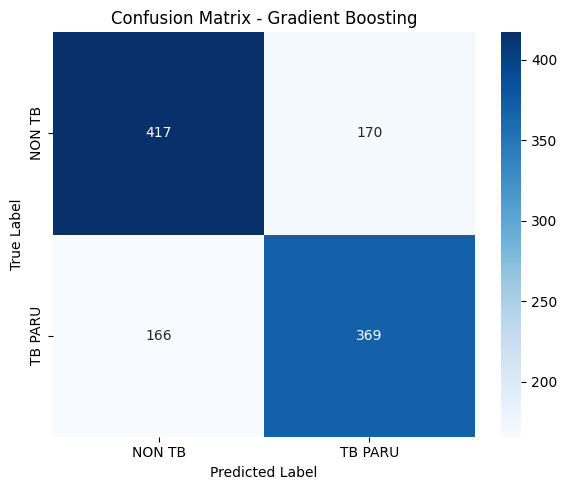


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.72      0.71      0.71       587
           1       0.68      0.69      0.69       535

    accuracy                           0.70      1122
   macro avg       0.70      0.70      0.70      1122
weighted avg       0.70      0.70      0.70      1122

Akurasi: 0.7005


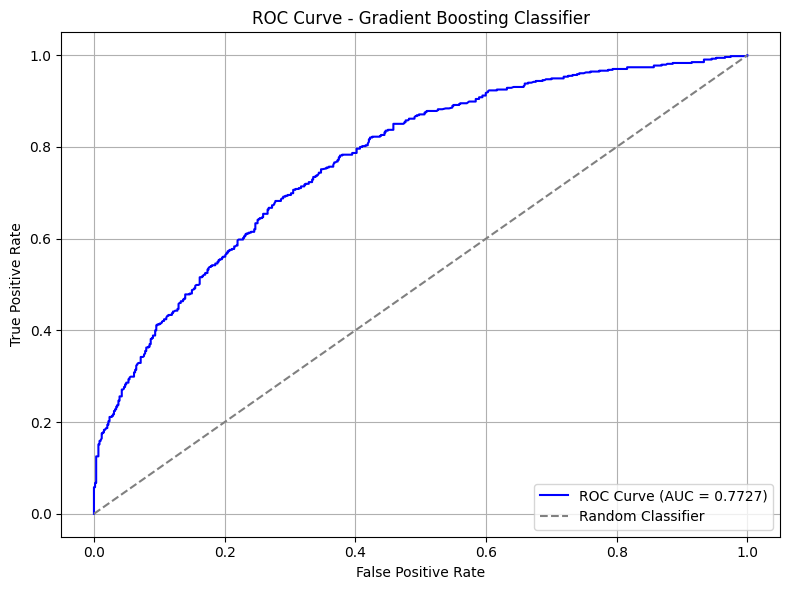

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    roc_curve, roc_auc_score
)

# 1. Buat model dengan parameter terbaik (manual)
gb = GradientBoostingClassifier(
    learning_rate=0.05,
    max_depth=2,
    min_samples_split=5,
    n_estimators=200,
    subsample=0.6,
    random_state=42
)

# 2. Gunakan Stratified 10-Fold CV
cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# 3a. Prediksi label untuk confusion matrix
y_pred = cross_val_predict(gb, X, y, cv=cv_strategy)

# 3b. Prediksi probabilitas kelas positif untuk ROC curve
y_prob = cross_val_predict(gb, X, y, cv=cv_strategy, method='predict_proba')[:, 1]

# 4. Hitung Confusion Matrix
cm = confusion_matrix(y, y_pred)

# 5. Label kelas (opsional)
class_names = ['NON TB', 'TB PARU']

# 6. Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Gradient Boosting")
plt.tight_layout()
plt.show()

# 7. Evaluasi tambahan
print("\n=== Classification Report ===")
print(classification_report(y, y_pred))
accuracy = accuracy_score(y, y_pred)
print(f"Akurasi: {accuracy:.4f}")

# 8. Hitung ROC Curve dan AUC
fpr, tpr, thresholds = roc_curve(y, y_prob)
auc = roc_auc_score(y, y_prob)

# 9. Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.4f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting Classifier")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


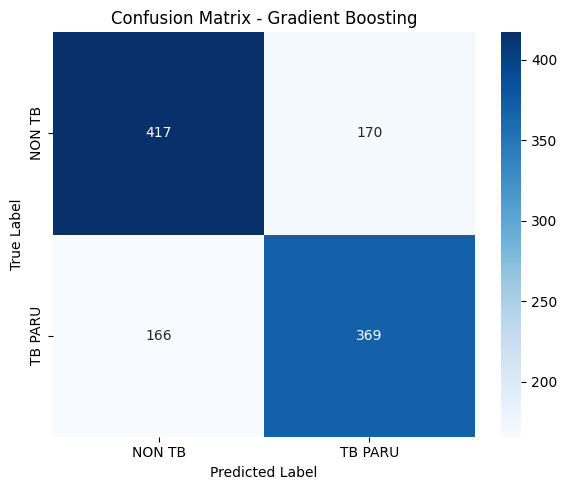


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.72      0.71      0.71       587
           1       0.68      0.69      0.69       535

    accuracy                           0.70      1122
   macro avg       0.70      0.70      0.70      1122
weighted avg       0.70      0.70      0.70      1122

Akurasi: 0.7005


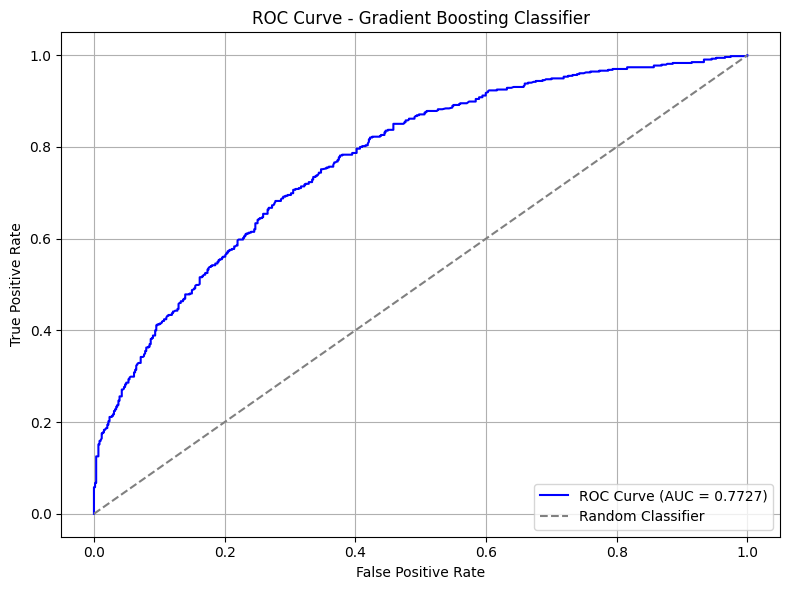


=== Tabel Evaluasi Tambahan ===
 Pred. Positive  Pred. Negative  True Positive  True Negative  Class Recall  Class Precision
            539             583            369            417       0.68972         0.684601
=== Tabel Evaluasi Mirip Gambar ===
               True Positive True Negative Class Precision
Pred. Positive           369           170          68.46%
Pred. Negative           166           417          71.53%
Class Recall          68.97%        71.04%                


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    roc_curve, roc_auc_score, precision_score, recall_score
)

# 1. Buat model dengan parameter terbaik (manual)
gb = GradientBoostingClassifier(
    learning_rate=0.05,
    max_depth=2,
    min_samples_split=5,
    n_estimators=200,
    subsample=0.6,
    random_state=42
)

# 2. Gunakan Stratified 10-Fold CV
cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# 3a. Prediksi label untuk confusion matrix
y_pred = cross_val_predict(gb, X, y, cv=cv_strategy)

# 3b. Prediksi probabilitas kelas positif untuk ROC curve
y_prob = cross_val_predict(gb, X, y, cv=cv_strategy, method='predict_proba')[:, 1]

# 4. Hitung Confusion Matrix
cm = confusion_matrix(y, y_pred)
tn, fp, fn, tp = cm.ravel()

# 5. Label kelas (opsional)
class_names = ['NON TB', 'TB PARU']

# 6. Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Gradient Boosting")
plt.tight_layout()
plt.show()

# 7. Evaluasi tambahan
print("\n=== Classification Report ===")
print(classification_report(y, y_pred))
accuracy = accuracy_score(y, y_pred)
print(f"Akurasi: {accuracy:.4f}")

# 8. Hitung ROC Curve dan AUC
fpr, tpr, thresholds = roc_curve(y, y_prob)
auc = roc_auc_score(y, y_prob)

# 9. Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.4f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting Classifier")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# 10. Tabel evaluasi tambahan
pred_positive = tp + fp
pred_negative = tn + fn
recall = recall_score(y, y_pred)
precision = precision_score(y, y_pred)

eval_table = pd.DataFrame({
    'Pred. Positive': [pred_positive],
    'Pred. Negative': [pred_negative],
    'True Positive': [tp],
    'True Negative': [tn],
    'Class Recall': [recall],
    'Class Precision': [precision]
})

print("\n=== Tabel Evaluasi Tambahan ===")
print(eval_table.to_string(index=False))

import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Misalnya hasil prediksi (dari model kamu):
# Confusion Matrix format: [[TN, FP], [FN, TP]]
cm = confusion_matrix(y, y_pred)
tn, fp, fn, tp = cm.ravel()

# Hitung precision dan recall per kelas
# Positif (label 1), Negatif (label 0)
precision_pos = precision_score(y, y_pred, pos_label=1)
precision_neg = precision_score(y, y_pred, pos_label=0)
recall_pos = recall_score(y, y_pred, pos_label=1)
recall_neg = recall_score(y, y_pred, pos_label=0)

# Format dalam bentuk persentase
def pct(x):
    return f"{x*100:.2f}%" if isinstance(x, float) else f"{x}%"

# Buat DataFrame dengan struktur seperti tabel gambar
eval_table = pd.DataFrame({
    "True Positive": [tp, fn, pct(recall_pos)],
    "True Negative": [fp, tn, pct(recall_neg)],
    "Class Precision": [pct(precision_pos), pct(precision_neg), ""]
}, index=["Pred. Positive", "Pred. Negative", "Class Recall"])

# Tampilkan tabel
print("=== Tabel Evaluasi Mirip Gambar ===")
print(eval_table.to_string())
